In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder_number = '001'
file_number = 2
main_dir = f'Geolife Trajectories 1.3/Data/{folder_number}/Trajectory/'

In [3]:
some_file = os.listdir(main_dir)[file_number]

In [4]:
some_file

'20081024234405.plt'

In [5]:
sample = np.genfromtxt(main_dir+some_file,
                       skip_header=6, delimiter=',', dtype=None, encoding=None)

In [6]:
sample

array([(40.013812, 116.306483, 0, 156, 39745.98894676, '2008-10-24', '23:44:05'),
       (40.013763, 116.306421, 0, 189, 39745.98895833, '2008-10-24', '23:44:06'),
       (40.013984, 116.306307, 0, 127, 39745.99217593, '2008-10-24', '23:48:44'),
       ...,
       (40.013974, 116.30635 , 0, 106, 39746.47460648, '2008-10-25', '11:23:26'),
       (40.013808, 116.306486, 0,  99, 39746.47915509, '2008-10-25', '11:29:59'),
       (40.013816, 116.306483, 0,  99, 39746.47917824, '2008-10-25', '11:30:01')],
      dtype=[('f0', '<f8'), ('f1', '<f8'), ('f2', '<i4'), ('f3', '<i4'), ('f4', '<f8'), ('f5', '<U10'), ('f6', '<U8')])

In [7]:
len(sample)

7075

In [8]:
import datetime

noon = datetime.datetime(2022, 5, 13, 12, 0, 0)
dinner = datetime.datetime(2022, 5, 13, 18, 0, 0)

def trajectories_in_timespan(sample, start, end):
    trajectory_list = []
    for trajectory in sample:
        date = trajectory[5]
        date_split = date.split('-')
        time = trajectory[6]
        time_split = time.split(':')
        trajectory_time = datetime.datetime(int(date_split[0]), int(date_split[1]), int(date_split[2]), int(time_split[0]), int(time_split[1]), int(time_split[2]))
        if trajectory_time.time() >= start.time() and trajectory_time.time() < end.time():
            trajectory_list.append(trajectory)
    return np.asarray(trajectory_list)

trajectory_sample = trajectories_in_timespan(sample, noon, dinner)

print(len(trajectory_sample))
print(trajectory_sample)

0
[]


In [9]:
df = pd.DataFrame(data=sample)
df = df.rename(columns={"f0": "Latitude", "f1": "Longitude", "f2": "0", "f3": "Altitude", "f4": "Date (Days since 12/30/1899)","f5": "Date", "f6": "Time"})
df_coordinates = df[['Latitude', 'Longitude']]

BBox = ((df_coordinates.iloc[:,1].min(),   df_coordinates.iloc[:,1].max(),      
         df_coordinates.iloc[:,0].min(), df_coordinates.iloc[:,0].max()))
BBox = ((116.3047, 116.3407, 39.9705, 40.0175))
# Smallest values for latitude and longitude

beijing_map = plt.imread(f'map001.png')

In [10]:
df

,Latitude,Longitude,0,Altitude,Date (Days since 12/30/1899),Date,Time
0,40.013812,116.306483,0,156,39745.988947,2008-10-24,23:44:05
1,40.013763,116.306421,0,189,39745.988958,2008-10-24,23:44:06
2,40.013984,116.306307,0,127,39745.992176,2008-10-24,23:48:44
3,40.014058,116.306319,0,126,39745.992234,2008-10-24,23:48:49
4,40.014114,116.306285,0,129,39745.992292,2008-10-24,23:48:54
...,...,...,...,...,...,...,...
7070,40.014106,116.306260,0,113,39746.474491,2008-10-25,11:23:16
7071,40.014042,116.306310,0,107,39746.474549,2008-10-25,11:23:21
7072,40.013974,116.306350,0,106,39746.474606,2008-10-25,11:23:26
7073,40.013808,116.306486,0,99,39746.479155,2008-10-25,11:29:59


In [11]:
from matplotlib.widgets import Slider, Button
import ipywidgets as widgets

In [12]:
data = df[['Latitude', 'Longitude', 'Time']]
selected = data['23:00:00' < data["Time"]]

In [13]:
data = df[['Latitude', 'Longitude', 'Time']]
selected = data[0:100]

amp = widgets.FloatSlider(min=1, max=70, value=1, description='Steps')

def update_plot(amp):
    i = int((amp - 1)*100)
    j = int(amp*100)
    selected = data[i:j]
    
    fig, ax = plt.subplots(figsize=(30,20))
    ax.scatter(selected.Longitude, selected.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
    ax.set_title('Plotting Spatial Data on Beijing Map')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(beijing_map, extent = BBox)
    plt.show()

widgets.interactive(update_plot, amp=amp)

interactive(children=(FloatSlider(value=1.0, description='Steps', max=70.0, min=1.0), Output()), _dom_classes=…

In [14]:
data = df[['Latitude', 'Longitude']]

In [15]:
data

,Latitude,Longitude
0,40.013812,116.306483
1,40.013763,116.306421
2,40.013984,116.306307
3,40.014058,116.306319
4,40.014114,116.306285
...,...,...
7070,40.014106,116.306260
7071,40.014042,116.306310
7072,40.013974,116.306350
7073,40.013808,116.306486


In [16]:
from gtda.mapper import make_mapper_pipeline, MapperInteractivePlotter
from gtda.mapper import Eccentricity
from gtda.mapper.filter import Projection
from gtda.mapper.cover import CubicalCover

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering

In [17]:
scaler = MinMaxScaler()
transformed_data = scaler.fit_transform(data)
transformed_data

array([[0.90013817, 0.95980712],
       [0.8984456 , 0.95943849],
       [0.90607945, 0.95876068],
       ...,
       [0.90573402, 0.95901634],
       [0.9       , 0.95982496],
       [0.90027634, 0.95980712]])

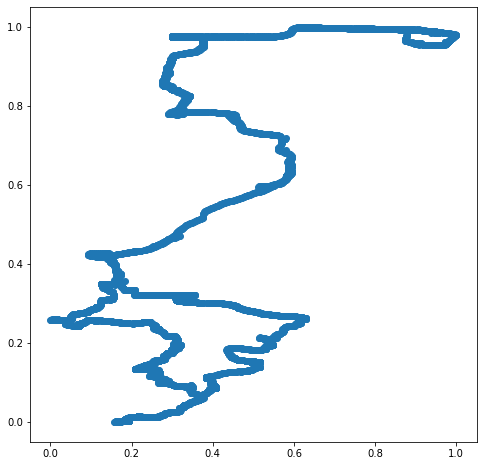

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.show()

In [19]:
scaler = MinMaxScaler()
filter_func = Projection(columns=[0, 1])
cover = CubicalCover(n_intervals=20, overlap_frac=0.3)
clusterer = DBSCAN()

pipe = make_mapper_pipeline(
    scaler=scaler,
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer)

plotter = MapperInteractivePlotter(pipe, data)
plotter.plot()

# Read CSV and create df for locations

In [20]:
table1 = pd.read_csv(r"location_per_minute.csv")

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176) have mixed types.Specify dtype option on import or set low_memory=False.



In [21]:
table2 = table1[46035:46179]

In [22]:
table2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,166,167,168,169,170,171,172,173,174,175
46035,2008-10-12 11:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46036,2008-10-12 11:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46037,2008-10-12 11:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46038,2008-10-12 11:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46039,2008-10-12 11:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(39.995846, 116.331806)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46174,2008-10-13 04:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46175,2008-10-13 04:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46176,2008-10-13 04:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46177,2008-10-13 04:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
table2.rename(columns={'Unnamed: 0':'Time'}, inplace=True)
table2

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Time,0,1,2,3,4,5,6,7,8,...,166,167,168,169,170,171,172,173,174,175
46035,2008-10-12 11:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46036,2008-10-12 11:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46037,2008-10-12 11:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46038,2008-10-12 11:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46039,2008-10-12 11:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(39.995846, 116.331806)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46174,2008-10-13 04:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46175,2008-10-13 04:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46176,2008-10-13 04:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46177,2008-10-13 04:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# i = 0
# for column in table2:
#     for row in table2[column]:
#         if not type(row) == float:
#             print(row)

In [24]:
table3 = (table2.stack()
   .reset_index(level=1)
   .groupby(level=0, sort=False)
   ['level_1'].apply(list)
)
table3

46035              [Time, 85]
46036              [Time, 85]
46037              [Time, 85]
46038              [Time, 85]
46039         [Time, 85, 173]
                 ...         
46174    [Time, 13, 125, 161]
46175    [Time, 13, 125, 161]
46176              [Time, 13]
46177              [Time, 13]
46178              [Time, 13]
Name: level_1, Length: 144, dtype: object

In [25]:
df_locations = pd.DataFrame(columns = ['Time', 'Latitude', 'Longitude'])
df_locations

,Time,Latitude,Longitude


In [26]:
table3.values
i = -1
index = 0
for list2 in table3:
    i += 1
    j = 0
    for values in list2:
        if j == 0:
            j += 1
            continue
        values = int(values)
        location = table2.iloc[i,values+1].replace('(', '').replace(')', '').split(", ")
        latitude = location[0]
        longitude = location[1]
        df_locations.loc[index] =  [table2.iloc[i,0], latitude, longitude]
        index += 1
    

In [27]:
df_locations

,Time,Latitude,Longitude
0,2008-10-12 11:07:00,39.982119,116.328823
1,2008-10-12 11:08:00,39.981827,116.328785
2,2008-10-12 11:09:00,39.981569,116.328403
3,2008-10-12 11:10:00,39.98147,116.327715
4,2008-10-12 11:11:00,39.980933,116.32726
...,...,...,...
208,2008-10-13 04:20:00,40.00698,116.318412
209,2008-10-13 04:20:00,40.00698,116.318412
210,2008-10-13 04:21:00,39.976855,116.330417
211,2008-10-13 04:22:00,39.977075,116.330988


In [28]:
map = plt.imread(f'beijing_campus.png')
BBoxCustom = ((116.2800, 116.3350, 39.9430, 39.9770))

In [29]:
data = df[['Latitude', 'Longitude', 'Time']]
selected = data[0:100]

amp = widgets.FloatSlider(min=1, max=70, value=1, description='Steps')

def update_plot(amp):
    i = int((amp - 1)*100)
    j = int(amp*100)
    selected = data[i:j]
    
    fig, ax = plt.subplots(figsize=(30,20))
    ax.scatter(selected.Longitude, selected.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
    ax.set_title('Plotting Spatial Data on Beijing Map')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(beijing_map, extent = BBox)
    plt.show()

widgets.interactive(update_plot, amp=amp)

interactive(children=(FloatSlider(value=1.0, description='Steps', max=70.0, min=1.0), Output()), _dom_classes=…

In [32]:
from matplotlib.widgets import Slider, Button
import ipywidgets as widgets

In [31]:
df_time_index = df_locations.set_index('Time')

In [35]:
df_time_index.astype({'Latitutde': 'float', 'Longitude': 'float'})

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [36]:
BBox

(116.3047, 116.3407, 39.9705, 40.0175)

In [42]:
unique_timestamps = sorted(list(set(df_time_index.index)))

In [44]:
unique_timestamps[0]

'2008-10-12 11:07:00'

In [38]:
df_time_index.loc[current_timestamp]['Longitude']

NameError: name 'current_timestamp' is not defined

interactive(children=(FloatSlider(value=1.0, description='Steps', max=144.0, min=1.0), Output()), _dom_classes…

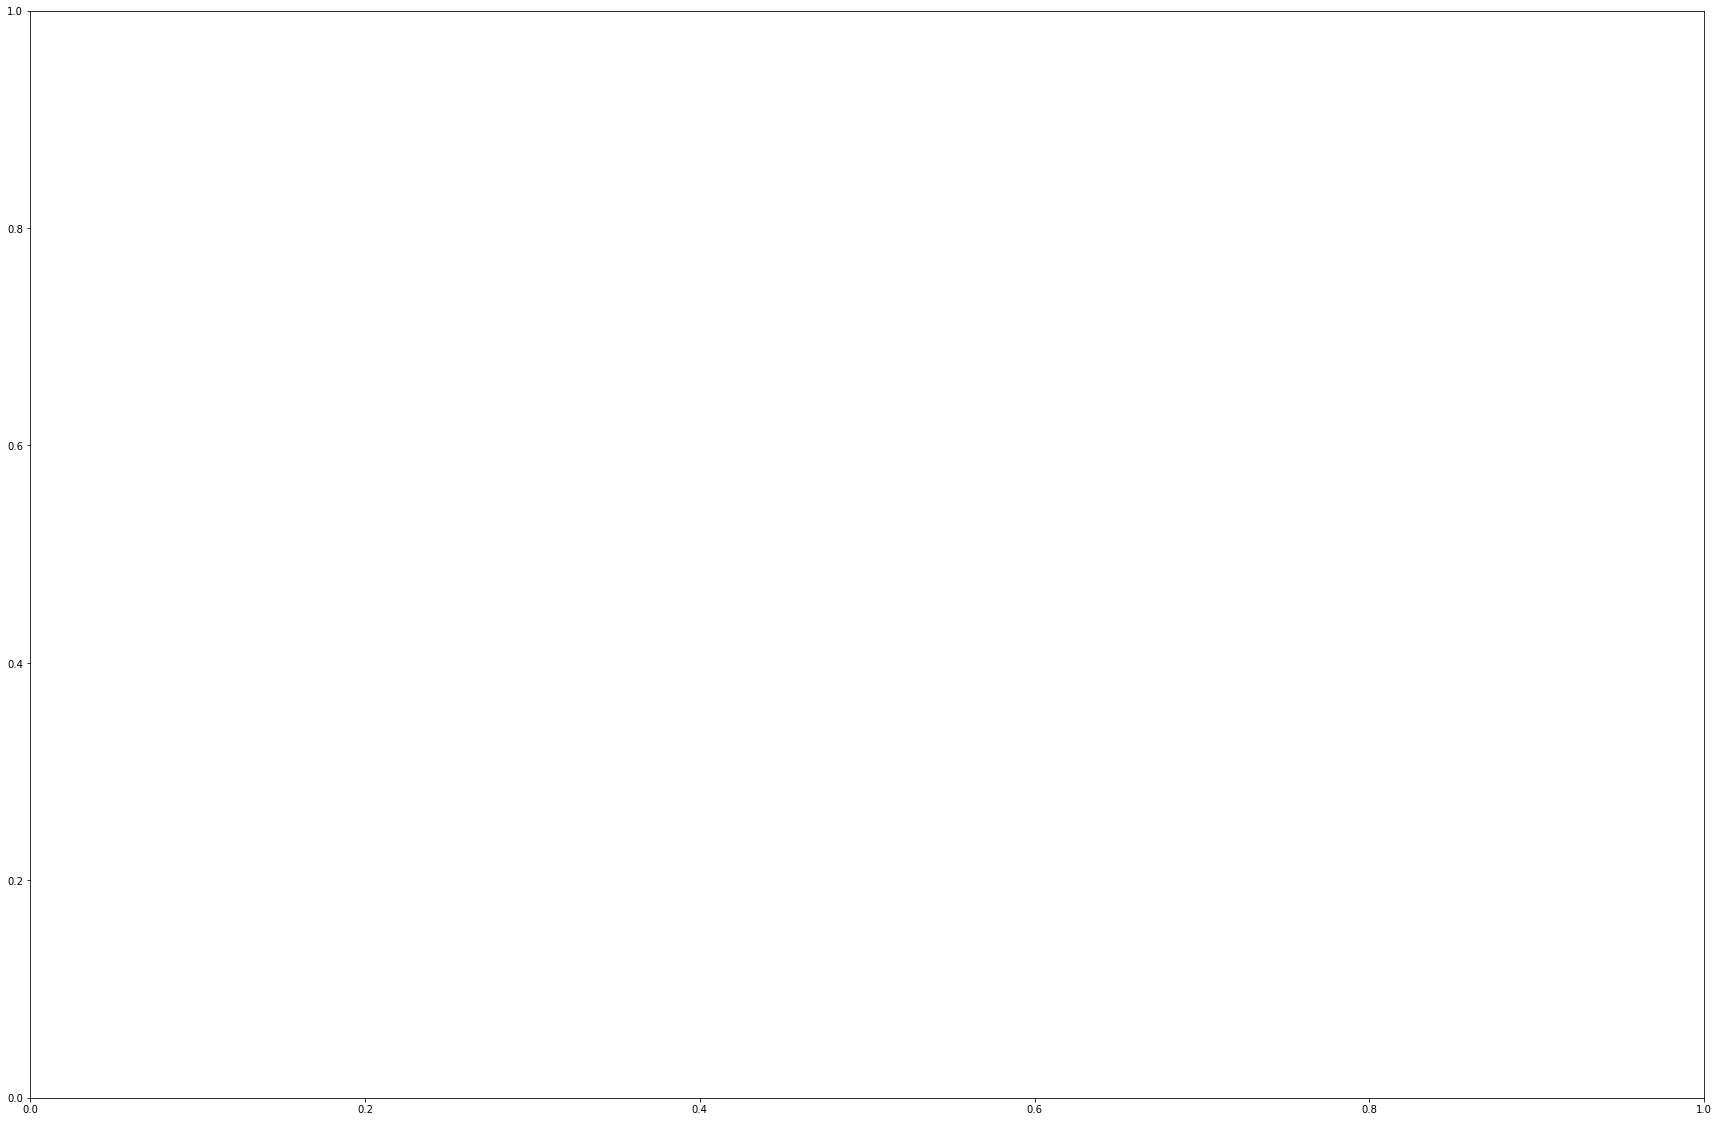

In [41]:
unique_timestamps = sorted(list(set(df_time_index.index)))

amp = widgets.FloatSlider(min=1, max=len(unique_timestamps), value=1, description='Steps')

def update_plot(amp):    
    amp = int(amp)
    fig, ax = plt.subplots(figsize=(30,20))
    
    current_timestamp = unique_timestamps[amp-1]
    #print(df_time_index.loc[current_timestamp]['Longitude'])
    x = df_time_index.loc[current_timestamp]['Longitude']
    y = df_time_index.loc[current_timestamp]['Latitude']
    
    print(x.values, y.values)
    #ax.imshow(map, extent=BBox)
    ax.set_title('Plotting Spatial Data on Beijing Campus Map')
    ax.scatter(x, y, c='b', s=20)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    plt.show()

widgets.interactive(update_plot, amp=amp)